In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [59]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X, y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1, noise=50)
X, y = make_regression(n_samples=200, n_features=2, n_informative=1, n_targets=1, noise=60)
y

array([ -49.27303744,  -31.38521787,   10.17625909,   78.98665062,
         52.31959981,  -29.59707954,   11.56277484,  -17.47435346,
        153.84323517,   29.73033049,  -30.82316737,  -90.05201453,
        -19.99102595,   28.80463969,   37.78196296,   31.36092441,
          9.88937609,  -21.03138073,   26.8802059 ,   41.62636055,
         33.09334614,   50.94348274,   46.79691396,   16.01413013,
       -139.27591083,  -37.10822685,  -13.19701749,  -14.86810795,
        -27.57979622,  101.42936968,   35.95403499,  -99.57912941,
        -23.00633979,   97.57451286,   21.66818952,   97.95848795,
        201.2544962 ,   -9.77843881,   -3.27938021,  -33.67455819,
         71.03402666,  -22.70347042,  -54.86074547,   21.73605347,
        -34.64810322,   58.1902579 ,  -46.7720094 ,  -17.74780898,
        -92.30326277,   62.9532173 ,  -26.06296092,  -31.10495433,
         10.77603958,  -84.08871219,   44.44486748,   39.07629489,
         62.82916526,   -1.21289664,   -2.62272034,   37.58820

In [61]:
import pandas as pd
import numpy as np


df = pd.DataFrame({
    'feature1': X[:, 0],
    'feature2': X[:, 1],
    'target': y})

df.corr()



,feature1,feature2,target
feature1,1.000000,-0.070716,0.216507
feature2,-0.070716,1.000000,0.107715
target,0.216507,0.107715,1.000000


In [63]:
print(df.shape)

(200, 3)


In [64]:
print(df.head())

   feature1  feature2     target
0 -0.790034 -1.844350 -49.273037
1  1.366939 -0.869678 -31.385218
2 -1.058814 -1.009290  10.176259
3  1.180907  1.490029  78.986651
4 -0.253533  1.166311  52.319600


In [66]:
fig=px.scatter_3d(df,x='feature1',y='feature2',z='target')
fig.show()

In [68]:
#  Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Train the model

In [70]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### Predict the result

In [71]:
y_pred = lr.predict(X_test)

##### Mean absolute error

In [73]:
print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 53.86437132082551


##### Mean squared error

In [74]:
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 4493.259829969107


##### r2_score error

In [75]:
print("R2 score:", r2_score(y_test, y_pred))

R2 score: -0.0766148533680382


In [76]:
X_train.shape

(160, 2)

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/laptop1-csv/laptop_price.csv", encoding='latin1')

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [88]:
df = pd.read_csv("/kaggle/input/laptop1-csv/laptop_price.csv", encoding='latin1')
print(df.columns.tolist())


['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros']


In [ ]:
df['Weight '] = df['Weight '].str.extract(r'(\d+(?:\.\d+)?)kg').astype('float')
df['Weight '].value_counts()


In [93]:
data=df.copy()
data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [ ]:
for i in df['Weight'].values:
    print(i)

In [96]:
df.Company.value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [98]:
import seaborn as sns

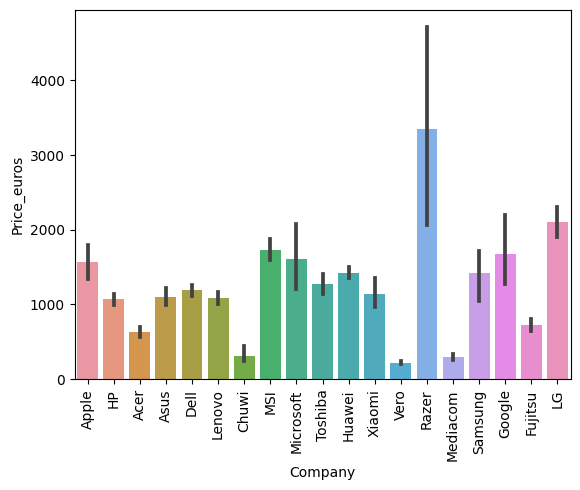

In [100]:
sns.barplot(data=df,x='Company',y='Price_euros')
plt.xticks(rotation='vertical')
plt.show()

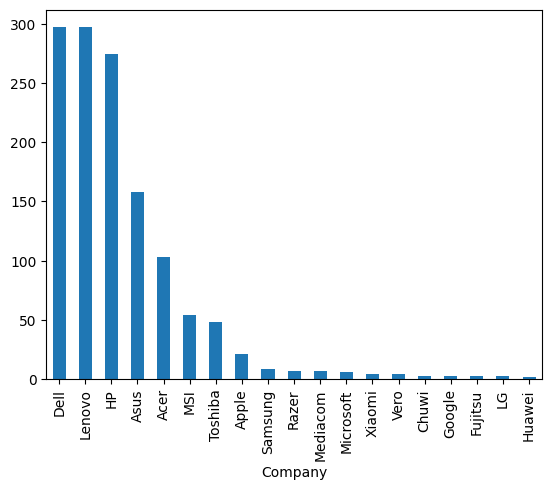

In [101]:
df['Company'].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='Ram'>

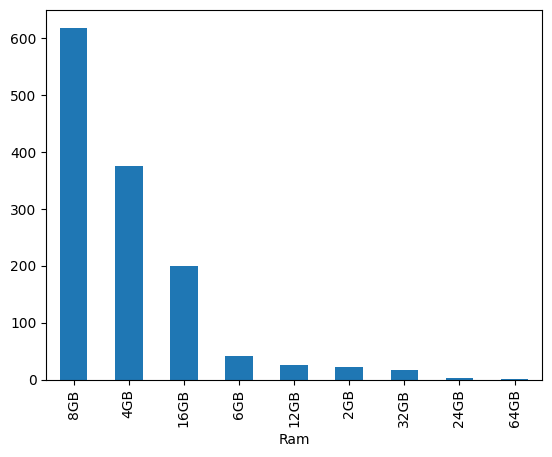

In [106]:
df.Ram.value_counts().plot(kind='bar')

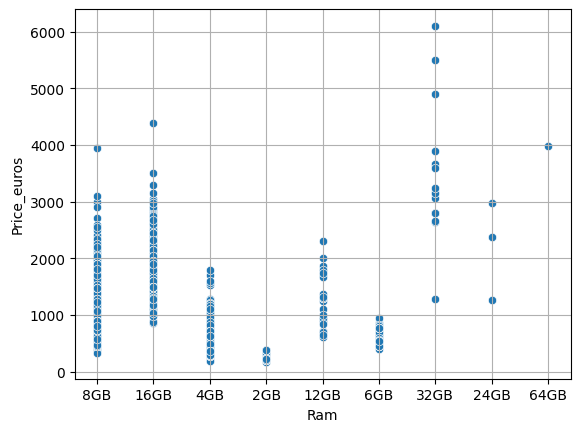

In [107]:
sns.scatterplot(data=df,x='Ram',y='Price_euros')
plt.grid()

<Axes: >

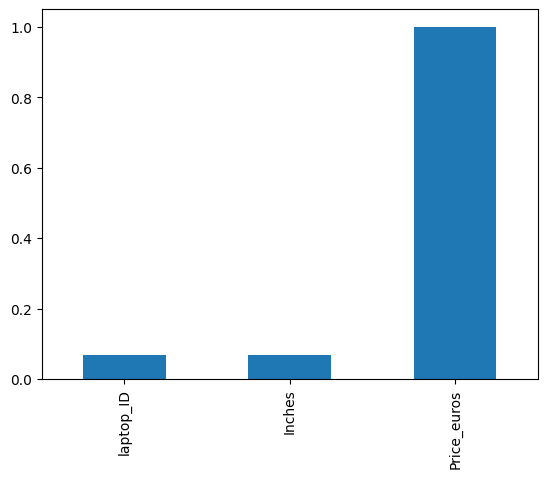

In [108]:
df.corr(numeric_only=True)['Price_euros'].plot(kind='bar')

In [110]:
df.Gpu.value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [114]:
df['Gpu_com']=df['Gpu'].apply(lambda x:x.split()[0])

In [112]:
df['Gpu'][0].split()[0]

'Intel'

In [115]:
df['Gpu_com'].value_counts()

Gpu_com
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [116]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [118]:
def combinerOp(Opsys):
    if Opsys=='Windows 10'or Opsys=='Windows 7' or Opsys=='Windows 10 S':
        return 'Windows'
    elif Opsys=='maxOS' or Opsys=='Mac OS X':
        return 'Macos'
    else:
        return "No Os/Linux"

In [119]:
df['OpSys_ew']=df['OpSys'].apply(combinerOp)

In [120]:
df['OpSys'].apply(combinerOp)

0       No Os/Linux
1       No Os/Linux
2       No Os/Linux
3       No Os/Linux
4       No Os/Linux
           ...     
1298        Windows
1299        Windows
1300        Windows
1301        Windows
1302        Windows
Name: OpSys, Length: 1303, dtype: object